# Rep_ Trial task

Big Five Personality Traits identified personality with 5 primary factors, known as **Dimensions** or **Traits**.

The 5 traits shortened for "OCEAN" are:

    Openness to experience
    Conscientiousness
    Extroversion
    Agreeableness    
    Neuroticism
    
Each dimension encompasses a large portion of personality-related terms. Known as **Sub-Dimension** / **Sub-Traits**.


---


Dimensions can present a high level interpretation of the person personality. Likewise, Sub-dimension can present a lower level more
Identified personality traits.


Dimension / Sub-dimension traits, Clarified through a percentile value. which is a way of expressing how personality scored relative to others on the same trait.

---

5 Trait percentiles can be estimated using Sub-traits questionnaire with 5
Category answers. Each answer category has a Sub-percentile itself:

    category0 -> 0%   or 0
    category1 -> 25%  or 1
    category2 -> 50%  or 2
    category3 -> 75%  or 3
    category4 -> 100%  or 4

The mean percentile of all Sub-trait related to one of the 5 Trait, is the percentile value.
we can normalized it to Z-Score equivalent ]...-2,...,2...[ using:

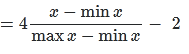


while Xmin = 2.27% , Xmax = 97.72% based on the following table:

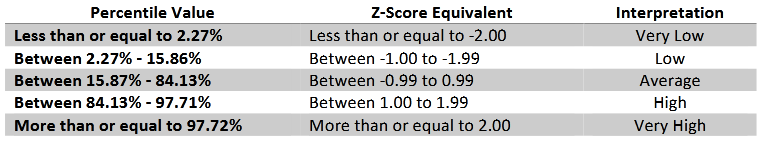




Changing directory to project folder

## Import needed Libraries, Import data from google sheet shared url

In [ ]:
#After changing directory to project folder
# Import needed analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import Regex library for text search and filtering 
import re

# import google authenticate to import google Credentials
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials

# import gsread to import the data from the shared google sheet
import gspread
# store google Credentials in local variable which have open_by_url feature that can open shared sheet
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
# The gc object has a function that we can use called open_by_url()
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1rIYnJpVMHLy_4_YaBmj7ElhXOBntMkv0gMvAPw-mFV8/edit#gid=0')
sheet = wb.worksheet('Data')
data = sheet.get_all_values()

## prepare and moderatize data for analysis

In [ ]:
# change the list of values in data to organized DataFrame
q_data = pd.DataFrame(data)

# make first row column names and take the data less the header row.
q_data = q_data.rename(columns=q_data.iloc[0])[1:].reset_index()

# delete the old index new created column
q_data = q_data.drop('index',axis=1)

# have a summary look on the dataframe makeing sure no missing data
q_data.info()
print('-=-='*25)
q_data.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 54 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   [Am the life of the party.]                               10 non-null     object
 1   [Feel little concern for others.]                         10 non-null     object
 2   [Am always prepared.]                                     10 non-null     object
 3   [Get stressed out easily.]                                10 non-null     object
 4   [Have a rich vocabulary.]                                 10 non-null     object
 5   [Don't talk a lot.]                                       10 non-null     object
 6   [Am interested in people.]                                10 non-null     object
 7   [Leave my belongings around.]                             10 non-null     object
 8   [Am relaxed most of the time.]   

,[Am the life of the party.],[Feel little concern for others.],[Am always prepared.],[Get stressed out easily.],[Have a rich vocabulary.],[Don't talk a lot.],[Am interested in people.],[Leave my belongings around.],[Am relaxed most of the time.],[Have difficulty understanding abstract ideas.],[Feel comfortable around people.],[Insult people.],[Pay attention to details.],[Worry about things.],[Have a vivid imagination.],[Keep in the background.],[Sympathize with others' feelings.],[Make a mess of things.],[Seldom feel blue.],[Am not interested in abstract ideas.],[Start conversations.],[Am not interested in other people's problems.],[Get chores done right away.],[Am easily disturbed.],[Have excellent ideas.],[Have little to say.],[Have a soft heart.],[Often forget to put things back in their proper place.],[Get upset easily.],[Do not have a good imagination.],[Talk to a lot of different people at parties.],[Am not really interested in others.],[Like order.],[Change my mood a lot.],[Am quick to understand things.],[Don't like to draw attention to myself.],[Take time out for others.],[Shirk my duties.],[Have frequent mood swings.],[Use difficult words.],[Don't mind being the center of attention.],[Feel others' emotions.],[Follow a schedule.],[Get irritated easily.],[Spend time reflecting on things.],[Am quiet around strangers.],[Make people feel at ease.],[Am exacting in my work.],[Often feel blue.],[Am full of ideas.],Link to report generated from their online content,What is your sex?,What age bracket do you fall in?,What is your country of residence?
0,Very Accurate,Moderately Inaccurate,Neither Accurate Nor Inaccurate,Moderately Inaccurate,Moderately Inaccurate,Neither Accurate Nor Inaccurate,Moderately Accurate,Very Accurate,Moderately Accurate,Moderately Inaccurate,Neither Accurate Nor Inaccurate,Neither Accurate Nor Inaccurate,Moderately Accurate,Very Inaccurate,Neither Accurate Nor Inaccurate,Moderately Accurate,Moderately Accurate,Very Inaccurate,Very Accurate,Very Inaccurate,Moderately Accurate,Moderately Inaccurate,Very Inaccurate,Moderately Inaccurate,Neither Accurate Nor Inaccurate,Very Inaccurate,Neither Accurate Nor Inaccurate,Very Inaccurate,Very Inaccurate,Moderately Inaccurate,Very Inaccurate,Moderately Inaccurate,Moderately Accurate,Very Inaccurate,Moderately Accurate,Moderately Accurate,Neither Accurate Nor Inaccurate,Moderately Accurate,Very Inaccurate,Moderately Inaccurate,Moderately Inaccurate,Moderately Accurate,Neither Accurate Nor Inaccurate,Very Inaccurate,Moderately Accurate,Very Accurate,Neither Accurate Nor Inaccurate,Very Inaccurate,Very Inaccurate,Neither Accurate Nor Inaccurate,https://drive.google.com/file/d/1Ta7XnZ3ky1Jh0...,Male,30-34,United States
1,Very Inaccurate,Moderately Accurate,Moderately Accurate,Very Inaccurate,Moderately Inaccurate,Very Accurate,Moderately Accurate,Very Accurate,Neither Accurate Nor Inaccurate,Very Inaccurate,Moderately Inaccurate,Very Inaccurate,Very Accurate,Very Accurate,Very Accurate,Very Accurate,Very Accurate,Moderately Accurate,Neither Accurate Nor Inaccurate,Very Inaccurate,Very Inaccurate,Moderately Inaccurate,Very Inaccurate,Very Inaccurate,Neither Accurate Nor Inaccurate,Moderately Accurate,Moderately Accurate,Very Accurate,Very Inaccurate,Very Inaccurate,Very Inaccurate,Moderately Inaccurate,Very Accurate,Very Accurate,Moderately Accurate,Neither Accurate Nor Inaccurate,Moderately Inaccurate,Neither Accurate Nor Inaccurate,Very Accurate,Neither Accurate Nor Inaccurate,Moderately Inaccurate,Moderately Accurate,Moderately Inaccurate,Moderately Inaccurate,Moderately Accurate,Very Accurate,Very Inaccurate,Very Inaccurate,Neither Accurate Nor Inaccurate,Moderately Accurate,https://drive.google.com/file/d/18wYLorM-8pRx5...,Female,18-24,Italy


In [ ]:
print('Check answers categories options. which we need to replace with scores:\n')
#check available option to replace with score
list_Ans_Cat = set()
for x in q_data.columns[0:1]:
    list_Ans_Cat.update([x for x in q_data[x]])
list_Ans_Cat

Check answers categories options. which we need to replace with scores:



{'Moderately Accurate',
 'Moderately Inaccurate',
 'Neither Accurate Nor Inaccurate',
 'Very Accurate',
 'Very Inaccurate'}

In [ ]:
#create a reference dictionary for replace process
scores_val = {'Very Inaccurate':0,
              'Moderately Inaccurate':1,
              'Neither Accurate Nor Inaccurate':2,
              'Moderately Accurate':3,
              'Very Accurate':4}

#apply and check output
q_data.replace(scores_val,inplace=True)#.astype(int)

print('All categorical answers replaced with equivalent values successfully:')
q_data.head(2)

All categorical answers replaced with equivalent values successfully:


,[Am the life of the party.],[Feel little concern for others.],[Am always prepared.],[Get stressed out easily.],[Have a rich vocabulary.],[Don't talk a lot.],[Am interested in people.],[Leave my belongings around.],[Am relaxed most of the time.],[Have difficulty understanding abstract ideas.],[Feel comfortable around people.],[Insult people.],[Pay attention to details.],[Worry about things.],[Have a vivid imagination.],[Keep in the background.],[Sympathize with others' feelings.],[Make a mess of things.],[Seldom feel blue.],[Am not interested in abstract ideas.],[Start conversations.],[Am not interested in other people's problems.],[Get chores done right away.],[Am easily disturbed.],[Have excellent ideas.],[Have little to say.],[Have a soft heart.],[Often forget to put things back in their proper place.],[Get upset easily.],[Do not have a good imagination.],[Talk to a lot of different people at parties.],[Am not really interested in others.],[Like order.],[Change my mood a lot.],[Am quick to understand things.],[Don't like to draw attention to myself.],[Take time out for others.],[Shirk my duties.],[Have frequent mood swings.],[Use difficult words.],[Don't mind being the center of attention.],[Feel others' emotions.],[Follow a schedule.],[Get irritated easily.],[Spend time reflecting on things.],[Am quiet around strangers.],[Make people feel at ease.],[Am exacting in my work.],[Often feel blue.],[Am full of ideas.],Link to report generated from their online content,What is your sex?,What age bracket do you fall in?,What is your country of residence?
0,4,1,2,1,1,2,3,4,3,1,2,2,3,0,2,3,3,0,4,0,3,1,0,1,2,0,2,0,0,1,0,1,3,0,3,3,2,3,0,1,1,3,2,0,3,4,2,0,0,2,https://drive.google.com/file/d/1Ta7XnZ3ky1Jh0...,Male,30-34,United States
1,0,3,3,0,1,4,3,4,2,0,1,0,4,4,4,4,4,3,2,0,0,1,0,0,2,3,3,4,0,0,0,1,4,4,3,2,1,2,4,2,1,3,1,1,3,4,0,0,2,3,https://drive.google.com/file/d/18wYLorM-8pRx5...,Female,18-24,Italy


In [ ]:
list(q_data.columns)

['[Am the life of the party.]',
 '[Feel little concern for others.]',
 '[Am always prepared.]',
 '[Get stressed out easily.]',
 '[Have a rich vocabulary.]',
 "[Don't talk a lot.]",
 '[Am interested in people.]',
 '[Leave my belongings around.]',
 '[Am relaxed most of the time.]',
 '[Have difficulty understanding abstract ideas.]',
 '[Feel comfortable around people.]',
 '[Insult people.]',
 '[Pay attention to details.]',
 '[Worry about things.]',
 '[Have a vivid imagination.]',
 '[Keep in the background.]',
 "[Sympathize with others' feelings.]",
 '[Make a mess of things.]',
 '[Seldom feel blue.]',
 '[Am not interested in abstract ideas.]',
 '[Start conversations.]',
 "[Am not interested in other people's problems.]",
 '[Get chores done right away.]',
 '[Am easily disturbed.]',
 '[Have excellent ideas.]',
 '[Have little to say.]',
 '[Have a soft heart.]',
 '[Often forget to put things back in their proper place.]',
 '[Get upset easily.]',
 '[Do not have a good imagination.]',
 '[Talk to

In [ ]:
# prepare dictionary to replace columns with their realated 5 traits
traits_cat = {'[Am the life of the party.]':'extraversion',
    '[Feel little concern for others.]':'rev_agreeableness',
    '[Am always prepared.]':'conscientiousness',
    '[Get stressed out easily.]':'neuroticism',
    '[Have a rich vocabulary.]':'openness',
    "[Don't talk a lot.]":'rev_extraversion',
    '[Am interested in people.]':'agreeableness',
    '[Leave my belongings around.]':'rev_conscientiousness',
    '[Am relaxed most of the time.]':'rev_neuroticism',
    '[Have difficulty understanding abstract ideas.]':'openness',
    '[Feel comfortable around people.]':'extraversion',
    '[Insult people.]':'rev_agreeableness',
    '[Pay attention to details.]':'conscientiousness',
    '[Worry about things.]':'neuroticism',
    '[Have a vivid imagination.]':'openness',
    '[Keep in the background.]':'rev_extraversion',
    "[Sympathize with others' feelings.]":'agreeableness',
    '[Make a mess of things.]':'rev_conscientiousness',
    '[Seldom feel blue.]':'neuroticism',
    '[Am not interested in abstract ideas.]':'rev_openness',
    '[Start conversations.]':'extraversion',
    "[Am not interested in other people's problems.]":'rev_agreeableness',
    '[Get chores done right away.]':'conscientiousness',
    '[Am easily disturbed.]':'neuroticism',
    '[Have excellent ideas.]':'openness',
    '[Have little to say.]':'rev_extraversion',
    '[Have a soft heart.]':'agreeableness',
    '[Often forget to put things back in their proper place.]':'rev_conscientiousness',
    '[Get upset easily.]':'neuroticism',
    '[Do not have a good imagination.]':'rev_openness',
    '[Talk to a lot of different people at parties.]':'extraversion',
    '[Am not really interested in others.]':'rev_agreeableness',
    '[Like order.]':'conscientiousness',
    '[Change my mood a lot.]':'neuroticism',
    '[Am quick to understand things.]':'openness',
    "[Don't like to draw attention to myself.]":'rev_extraversion',
    '[Take time out for others.]':'agreeableness',
    '[Shirk my duties.]':'rev_conscientiousness',
    '[Have frequent mood swings.]':'neuroticism',
    '[Use difficult words.]':'openness',
    "[Don't mind being the center of attention.]":'extraversion',
    "[Feel others' emotions.]":'agreeableness',
    '[Follow a schedule.]':'conscientiousness',
    '[Get irritated easily.]':'neuroticism',
    '[Spend time reflecting on things.]':'openness',
    '[Am quiet around strangers.]':'rev_extraversion',
    '[Make people feel at ease.]':'agreeableness',
    '[Am exacting in my work.]':'conscientiousness',
    '[Often feel blue.]':'neuroticism',
    '[Am full of ideas.]':'openness',
    'Link to report generated from their online content':'Link to report generated from their online content',
    'What is your sex?':'What is your sex?',
    'What age bracket do you fall in?':'What age bracket do you fall in?',
    'What is your country of residence?':'What is your country of residence?'}

In [ ]:
# replace dataframe columns name using the created dictionary
q_data.rename(columns=traits_cat, inplace=True)

print('All columns are with Traits/rev_traits name: \n')
q_data.columns

All columns are with Traits/rev_traits name: 



Index(['extraversion', 'rev_agreeableness', 'conscientiousness', 'neuroticism',
       'openness', 'rev_extraversion', 'agreeableness',
       'rev_conscientiousness', 'rev_neuroticism', 'openness', 'extraversion',
       'rev_agreeableness', 'conscientiousness', 'neuroticism', 'openness',
       'rev_extraversion', 'agreeableness', 'rev_conscientiousness',
       'neuroticism', 'rev_openness', 'extraversion', 'rev_agreeableness',
       'conscientiousness', 'neuroticism', 'openness', 'rev_extraversion',
       'agreeableness', 'rev_conscientiousness', 'neuroticism', 'rev_openness',
       'extraversion', 'rev_agreeableness', 'conscientiousness', 'neuroticism',
       'openness', 'rev_extraversion', 'agreeableness',
       'rev_conscientiousness', 'neuroticism', 'openness', 'extraversion',
       'agreeableness', 'conscientiousness', 'neuroticism', 'openness',
       'rev_extraversion', 'agreeableness', 'conscientiousness', 'neuroticism',
       'openness', 'Link to report generated fr

In [ ]:
# reverse score for rev traits columns
rev_scores = {0:4,1:3,2:2,3:1,4:0}
col_Unify = {'openness':'Openness','rev_openness':'Openness',
             'conscientiousness':'Conscientiousness','rev_conscientiousness':'Conscientiousness',
             'extraversion':'Extraversion','rev_extraversion':'Extraversion',
             'agreeableness':'Agreeableness','rev_agreeableness':'Agreeableness',
             'neuroticism':'Emotional range','rev_neuroticism':'Emotional range'
                }

# identify reverse columns names
rev_columns = []
for cx in q_data.columns:
    if re.search('rev_*',cx.lower()):
        rev_columns.append(cx)
rev_columns = set(rev_columns)

# reverse score under rev_traits columns
for x in rev_columns:
    q_data[x] = q_data[x].replace(rev_scores)

#Unify columns
q_data.rename(columns=col_Unify, inplace=True)

# create new dataframe with percentile instead of answer categories 
scor_to_perc = {0:0,1:25,2:50,3:75,4:100}
Perc_q_data = q_data.replace(scor_to_perc).copy()

#create a users name list and modify dataframe index by it
User_names = ['Evojanus','Deborahvilla9','andreatappe','bayrakmeltem','athena-thompson-techlever','belindawilson','simongphillips','pc40','alexayhat','DrLeighYourVetOnline']
Perc_q_data.index = User_names

print('making sure only 5 Traits are there:\n\n')
set(Perc_q_data.columns) 

making sure only 5 Traits are there:




{'Agreeableness',
 'Conscientiousness',
 'Emotional range',
 'Extraversion',
 'Link to report generated from their online content',
 'Openness',
 'What age bracket do you fall in?',
 'What is your country of residence?',
 'What is your sex?'}

In [ ]:
print('reverse dataframe row/columns to have each user in a separate column, and Traits Average percentile as rows')

# reverse dataframe row/columns to have each users as a column
User_Traits_data = Perc_q_data[['Agreeableness',
                'Conscientiousness',
                'Emotional range',
                'Extraversion',
                'Openness']].T.reset_index()

#calculate users Trait percentile        
User_Traits_data = User_Traits_data.groupby('index').mean()

#create new columns for users Traits rows and we will us column name from User_names in preivious cell
# first we calculate z_score then normalize it to create row values
for x in User_names:
    User_Traits_data['%s_row'%x] = 4*((User_Traits_data[x]-2.27)/(97.72-2.27))-2
    User_Traits_data['%s_row'%x] = (User_Traits_data['%s_row'%x]-User_Traits_data['%s_row'%x].min())/(User_Traits_data['%s_row'%x].max()-User_Traits_data['%s_row'%x].min())

# create Interpretation columns based on np.select with a list of conditions and values  for Interpretation Trait based on percentile
for x in User_names:
    temp = []
    User_Traits_data['%s_Interpretation'%x] = " "
    for perc in User_Traits_data[x]:
        temp.append(np.select([ (perc <= 2.27),
                                (perc > 2.27) & (perc <= 15.87),
                                (perc > 15.87) & (perc <= 84.13),
                                (perc > 84.13) & (perc <= 97.72),
                                (perc > 97.72)
                                ] , ['Very Low', 'Low', 'Average', 'High', 'Very High']))
    User_Traits_data['%s_Interpretation'%x] = temp

#re-name columns 
User_Traits_data.columns = ['Evojanus(%)', 'Deborahvilla9(%)', 'andreatappe(%)', 'bayrakmeltem(%)',
                            'athena-thompson-techlever(%)', 'belindawilson(%)', 'simongphillips(%)',
                            'pc40(%)', 'alexayhat(%)', 'DrLeighYourVetOnline(%)', 'Evojanus_row',
                            'Deborahvilla9_row', 'andreatappe_row', 'bayrakmeltem_row',
                            'athena-thompson-techlever_row', 'belindawilson_row',
                            'simongphillips_row', 'pc40_row', 'alexayhat_row',
                            'DrLeighYourVetOnline_row', 'Evojanus_Interpretation',
                            'Deborahvilla9_Interpretation', 'andreatappe_Interpretation',
                            'bayrakmeltem_Interpretation', 'athena-thompson-techlever_Interpretation',
                            'belindawilson_Interpretation', 'simongphillips_Interpretation',
                            'pc40_Interpretation', 'alexayhat_Interpretation',
                            'DrLeighYourVetOnline_Interpretation']

User_Traits_data

reverse dataframe row/columns to have each user in a separate column, and Traits Average percentile as rows


,Evojanus(%),Deborahvilla9(%),andreatappe(%),bayrakmeltem(%),athena-thompson-techlever(%),belindawilson(%),simongphillips(%),pc40(%),alexayhat(%),DrLeighYourVetOnline(%),Evojanus_row,Deborahvilla9_row,andreatappe_row,bayrakmeltem_row,athena-thompson-techlever_row,belindawilson_row,simongphillips_row,pc40_row,alexayhat_row,DrLeighYourVetOnline_row,Evojanus_Interpretation,Deborahvilla9_Interpretation,andreatappe_Interpretation,bayrakmeltem_Interpretation,athena-thompson-techlever_Interpretation,belindawilson_Interpretation,simongphillips_Interpretation,pc40_Interpretation,alexayhat_Interpretation,DrLeighYourVetOnline_Interpretation
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Agreeableness,65.0,62.5,67.5,80.0,55.0,85.0,77.5,87.5,72.5,92.5,1.000000,0.952381,0.727273,1.00,0.800000,1.00,1.0,1.0000,0.700000,1.0,Average,Average,Average,Average,Average,High,Average,High,Average,High
Conscientiousness,47.5,37.5,60.0,80.0,62.5,67.5,77.5,67.5,57.5,42.5,0.631579,0.476190,0.590909,1.00,1.000000,0.72,1.0,0.5000,0.500000,0.0,Average,Average,Average,Average,Average,Average,Average,Average,Average,Average
Emotional range,17.5,47.5,27.5,70.0,25.0,22.5,52.5,47.5,95.0,57.5,0.000000,0.666667,0.000000,0.00,0.000000,0.00,0.0,0.0000,1.000000,0.3,Average,Average,Average,Average,Average,Average,Average,Average,High,Average
Extraversion,45.0,12.5,60.0,72.5,57.5,65.0,67.5,62.5,20.0,92.5,0.578947,0.000000,0.590909,0.25,0.866667,0.68,0.6,0.3750,0.000000,1.0,Average,Low,Average,Average,Average,Average,Average,Average,Average,High
Openness,55.0,65.0,82.5,80.0,60.0,70.0,70.0,65.0,77.5,72.5,0.789474,1.000000,1.000000,1.00,0.933333,0.76,0.7,0.4375,0.766667,0.6,Average,Average,Average,Average,Average,Average,Average,Average,Average,Average


Users Overall dimension plots


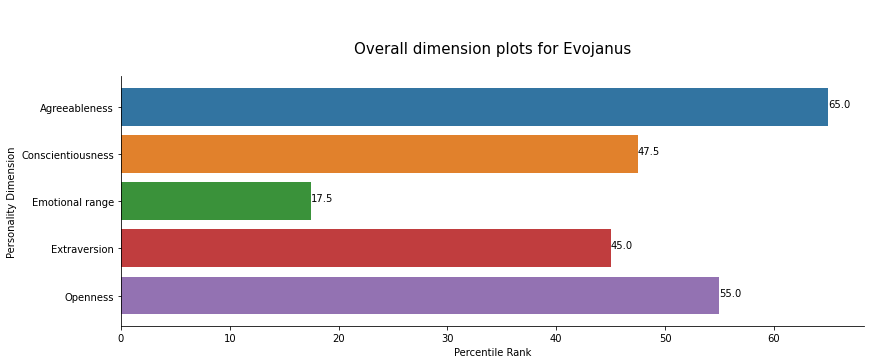

Evojanus values Interpretation:
                   Percentile       Raw Interpretation
index                                                 
Agreeableness            65.0  1.000000        Average
Conscientiousness        47.5  0.631579        Average
Emotional range          17.5  0.000000        Average
Extraversion             45.0  0.578947        Average
Openness                 55.0  0.789474        Average


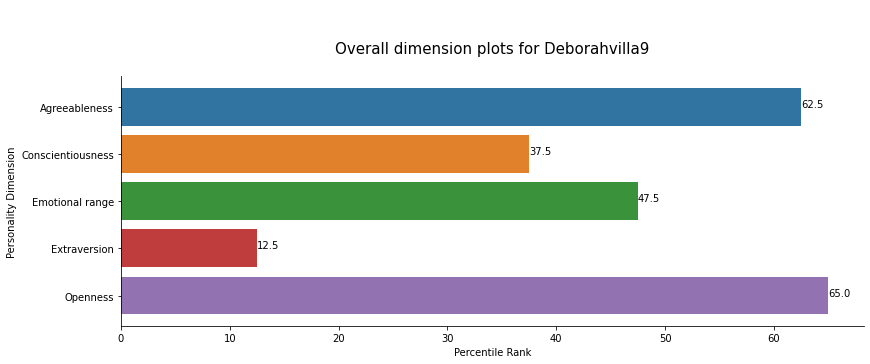

Deborahvilla9 values Interpretation:
                   Percentile       Raw Interpretation
index                                                 
Agreeableness            62.5  0.952381        Average
Conscientiousness        37.5  0.476190        Average
Emotional range          47.5  0.666667        Average
Extraversion             12.5  0.000000            Low
Openness                 65.0  1.000000        Average


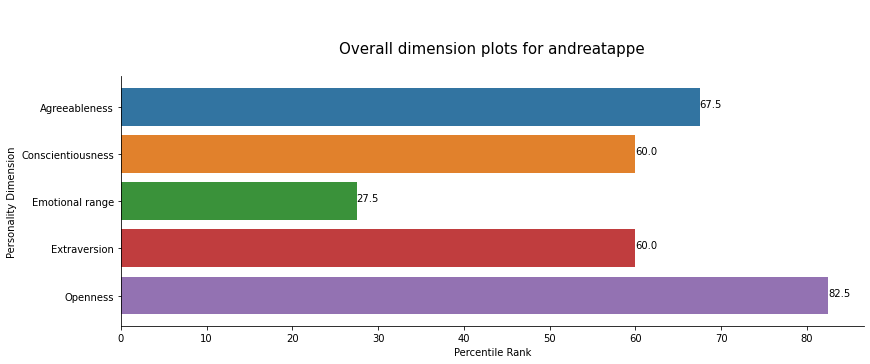

andreatappe values Interpretation:
                   Percentile       Raw Interpretation
index                                                 
Agreeableness            67.5  0.727273        Average
Conscientiousness        60.0  0.590909        Average
Emotional range          27.5  0.000000        Average
Extraversion             60.0  0.590909        Average
Openness                 82.5  1.000000        Average


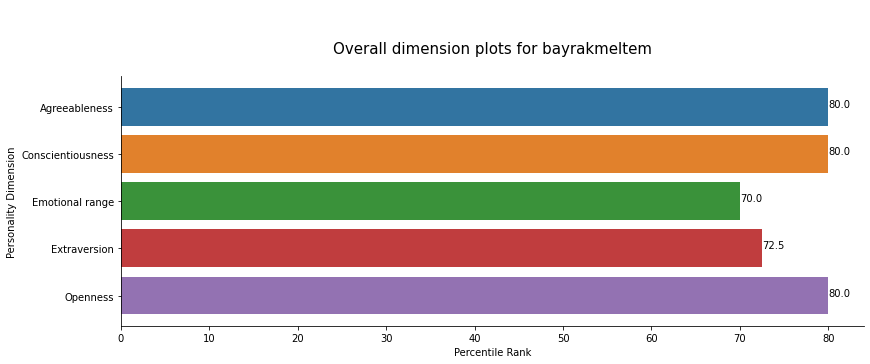

bayrakmeltem values Interpretation:
                   Percentile   Raw Interpretation
index                                             
Agreeableness            80.0  1.00        Average
Conscientiousness        80.0  1.00        Average
Emotional range          70.0  0.00        Average
Extraversion             72.5  0.25        Average
Openness                 80.0  1.00        Average


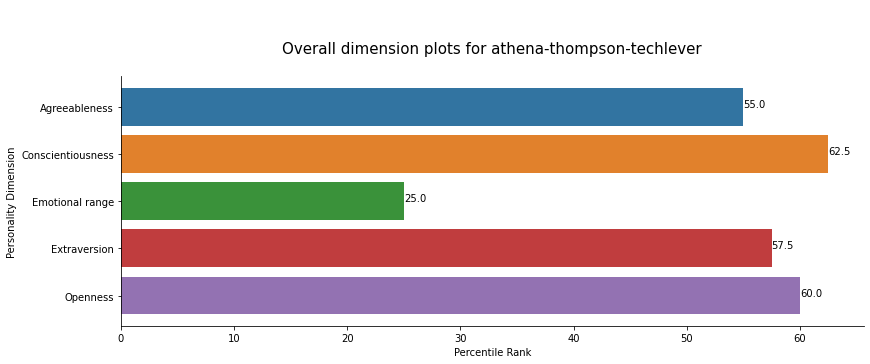

athena-thompson-techlever values Interpretation:
                   Percentile       Raw Interpretation
index                                                 
Agreeableness            55.0  0.800000        Average
Conscientiousness        62.5  1.000000        Average
Emotional range          25.0  0.000000        Average
Extraversion             57.5  0.866667        Average
Openness                 60.0  0.933333        Average


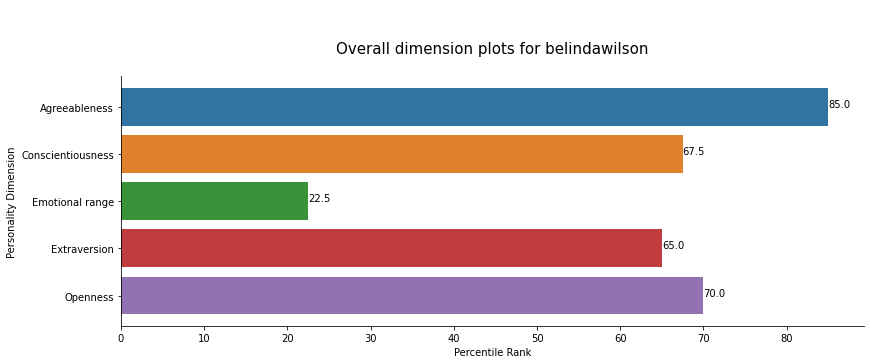

belindawilson values Interpretation:
                   Percentile   Raw Interpretation
index                                             
Agreeableness            85.0  1.00           High
Conscientiousness        67.5  0.72        Average
Emotional range          22.5  0.00        Average
Extraversion             65.0  0.68        Average
Openness                 70.0  0.76        Average


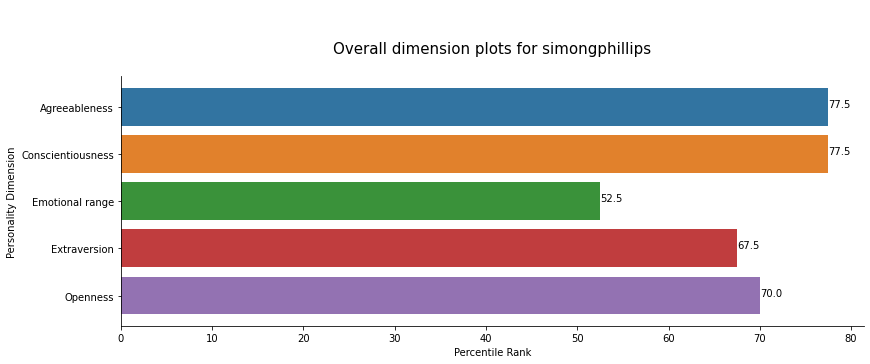

simongphillips values Interpretation:
                   Percentile  Raw Interpretation
index                                            
Agreeableness            77.5  1.0        Average
Conscientiousness        77.5  1.0        Average
Emotional range          52.5  0.0        Average
Extraversion             67.5  0.6        Average
Openness                 70.0  0.7        Average


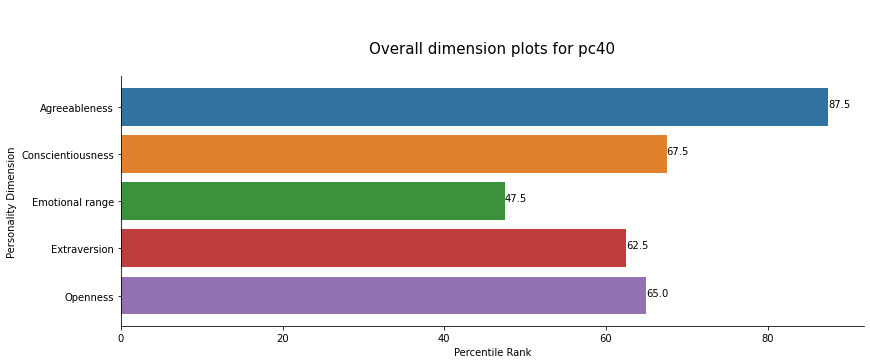

pc40 values Interpretation:
                   Percentile     Raw Interpretation
index                                               
Agreeableness            87.5  1.0000           High
Conscientiousness        67.5  0.5000        Average
Emotional range          47.5  0.0000        Average
Extraversion             62.5  0.3750        Average
Openness                 65.0  0.4375        Average


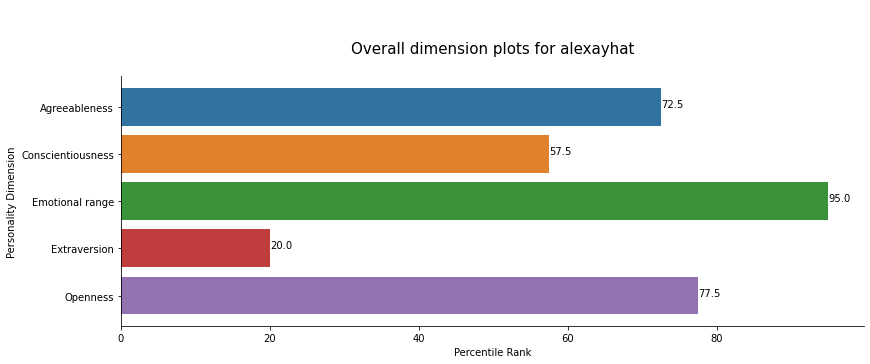

alexayhat values Interpretation:
                   Percentile       Raw Interpretation
index                                                 
Agreeableness            72.5  0.700000        Average
Conscientiousness        57.5  0.500000        Average
Emotional range          95.0  1.000000           High
Extraversion             20.0  0.000000        Average
Openness                 77.5  0.766667        Average


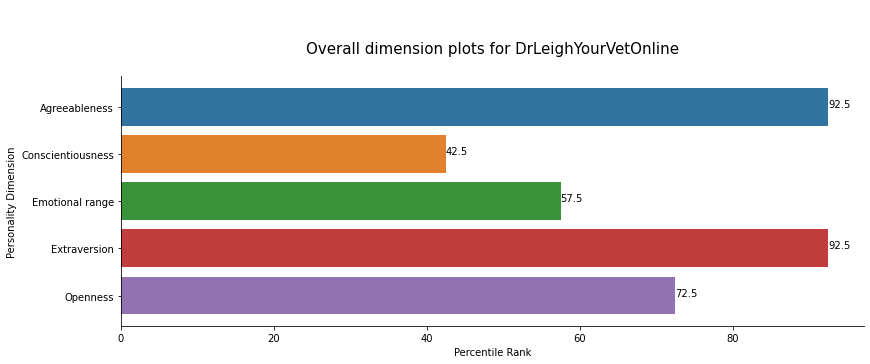

DrLeighYourVetOnline values Interpretation:
                   Percentile  Raw Interpretation
index                                            
Agreeableness            92.5  1.0           High
Conscientiousness        42.5  0.0        Average
Emotional range          57.5  0.3        Average
Extraversion             92.5  1.0           High
Openness                 72.5  0.6        Average


In [ ]:
print('Users Overall dimension plots')
for idx in User_names:
    sns.catplot(data=User_Traits_data,
                    x='%s(%%)'%idx,
                    y=['Agreeableness','Conscientiousness','Emotional range','Extraversion','Openness'],
                    kind='bar',
                    height=4,
                    aspect=3)
    plt.title('\n\nOverall dimension plots for %s\n'%idx,fontsize=15)
    plt.xlabel('Percentile Rank')
    plt.ylabel('Personality Dimension')
    for i, x in enumerate(User_Traits_data['%s(%%)'%idx]):
        plt.text(x,i,x)
    plt.autoscale()    
    plt.show()
    temp = pd.DataFrame()
    temp = User_Traits_data[['%s(%%)'%idx,'%s_row'%idx,'%s_Interpretation'%idx]]
    temp.columns = ['Percentile','Raw','Interpretation']
    print('%s values Interpretation:'%idx)
    print(temp)

In [607]:
#save data to csv file
User_Traits_data.to_csv('User_Traits_data.csv')

In [ ]:
# to read pdf file
!pip install tabula-py
from tabula import read_pdf
from tabula import convert_into
# to import file from drive 
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

#Authenticate and create the PyDrive client
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
# using Regex filter link to extract files ids
pdf_files_ids = []
for x in q_data['Link to report generated from their online content']:
    print(re.search('\d.+/',x).group(0)[0:-1])
    pdf_files_ids.append(re.search('\d.+/',x).group(0)[0:-1])

1Ta7XnZ3ky1Jh08dnbUuzl7Gn1pdjHIl3
18wYLorM-8pRx55_HWAOaKcadvty3xKLu
1LntKd4u6NpC7kgs708tyX8m-WE3wEUNU
1bj-tpAS6QOT46LWdclBM0hS7Ocvqfiwd
18dc9CZOlryozzcbmG7Mcy4v-4GYy0MLS
12Mu40gGsCwQ6XEwYyWkWgcS4wjsRSD2o
1ny-ajeIuCSqWAxDohxWjF32_Dg4GrUFs
1gVlUe2HP9VKLDP2zaDmdSe3CXVxv84i2
1wkYubQ87gWyXJp6Rq3jENPwKsNHZKDsA
172QrinGJ1E-EFE_eLlrOikvX5QQ5hEPm


In [ ]:
# using the list of ids import the files into colab with specific names in User_names list
# after creating the pdf file read and save it using tabula-py to list 
df_all = []
for i,x in enumerate(pdf_files_ids):
    downloaded = drive.CreateFile({'id':x}) 
    downloaded.GetContentFile('%s_report.pdf'%User_names[i]) 
    df_all.append(read_pdf('%s_report.pdf'%User_names[i], pages ='all'))

In [ ]:
# now we have all report tabulas in the list 
print('print Evojanus 5 Traits Interpretation table which is the first table \'0\'\nEvojanus index is 0 in the list(in the User names list)\n')
df_all[0][0]

print Evojanus 5 Traits Interpretation table which is the first table '0'
Evojanus index is 0 in the list(in the User names list)



,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Trait,Percentile,Raw,Interpretation
1,Openness to Experience,95.0%,0.8,High
2,Conscientiousness,45.0%,0.62,Average
3,Extraversion,6.0%,0.48,Low
4,Agreeableness,2.0%,0.66,Very Low
5,Emotional Range,34.0%,0.51,Average


In [ ]:
#extrat all and only the first 5 Traits tables from the df_all list and save them in organized DataFrames to compare
df_all_5Trait = []
for x in df_all:
    df_all_5Trait.append(pd.DataFrame(x[0]))

# prepare dataframe by ignoring first row after making it as columns names
# also make the 5 Traits column as index. remembering to delete old index column
for i in range(len(df_all_5Trait)):
    df_all_5Trait[i] = df_all_5Trait[i].rename(columns=df_all_5Trait[i].iloc[0])[1:].reset_index().set_index('Trait')
    df_all_5Trait[i] = df_all_5Trait[i].drop('index',axis=1)

# delete % character from Percentile column and convert its values type to float
for User_df in df_all_5Trait:
    for i,x in enumerate(User_df['Percentile']):
        User_df['Percentile'].iloc[i] = re.sub('%$','',x)
    User_df[['Percentile','Raw']] = User_df[['Percentile','Raw']].astype(float)

# make sure all done succesfully with nothing missing
df_all_5Trait[0].info()
print('-=-='*15,'\n\nAll users 5 Traits Interpretation tables are prepared, cleaned and ready...!\nExample first two tables:\n')
df_all_5Trait[0:2]

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Openness to Experience to Emotional Range
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Percentile      5 non-null      float64
 1   Raw             5 non-null      float64
 2   Interpretation  5 non-null      object 
dtypes: float64(2), object(1)
memory usage: 160.0+ bytes
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-= 

All users 5 Traits Interpretation tables are prepared, cleaned and ready...!
Example first two tables:



[                        Percentile   Raw Interpretation
 Trait                                                  
 Openness to Experience        95.0  0.80           High
 Conscientiousness             45.0  0.62        Average
 Extraversion                   6.0  0.48            Low
 Agreeableness                  2.0  0.66       Very Low
 Emotional Range               34.0  0.51        Average,
                         Percentile   Raw Interpretation
 Trait                                                  
 Openness to Experience        81.0  0.78        Average
 Conscientiousness             36.0  0.61        Average
 Extraversion                  12.0  0.50            Low
 Agreeableness                 95.0  0.81           High
 Emotional Range               89.0  0.64           High]

In [ ]:
# we can get the Agreeableness, Conscientiousness as the first two values if sorted 
df_all_5Trait[0].sort_index()[0:2]#['Percentile'][0]

,Percentile,Raw,Interpretation
Trait,,,
Agreeableness,2.0,0.66,Very Low
Conscientiousness,45.0,0.62,Average


In [ ]:
# create a comparison  DataFrame 
comparison_df = pd.DataFrame(data=None,columns=['Agree_rep','Agree_ans','Agree_compare','Consci_rep','Consci_ans','Consci_compare'])

# fill with data and make comparison_df based on the subtraction of the two Agreeableness percintile and Conscientiousness percintile.
for i, x in enumerate(User_names):
    comparison_df = comparison_df.append({'Agree_rep':df_all_5Trait[i].sort_index()[0:2]['Percentile'][0],
                                          'Agree_ans':User_Traits_data['%s(%%)'%x].sort_index()[0:2][0],
                                          'Consci_rep':df_all_5Trait[i].sort_index()[0:2]['Percentile'][1],
                                          'Consci_ans':User_Traits_data['%s(%%)'%x].sort_index()[0:2][1]},ignore_index=True)
    
comparison_df['Agree_compare']=np.abs(comparison_df['Agree_rep'] - comparison_df['Agree_ans'])
comparison_df['Consci_compare']=np.abs(comparison_df['Consci_rep'] - comparison_df['Consci_ans'])

# create category columns based on filtering and categorizing the comparison_df columns
comparison_df['Agree_compare_cat']= [np.select([(diff <= 5),
                                                (diff > 5) & (diff <= 20),
                                                (diff > 20) & (diff <= 40),
                                                (diff > 40)
                                                ] , ['conforming', 'Convergent', 'far', 'Opposite']) for diff in comparison_df['Agree_compare']]


comparison_df['Consci_compare_cat']= [np.select([(diff <= 5),
                                                (diff > 5) & (diff <= 20),
                                                (diff > 20) & (diff <= 40),
                                                (diff > 40)
                                                ] , ['conforming', 'Convergent', 'far', 'Opposite']) for diff in comparison_df['Consci_compare']]

comparison_df['Agree_compare_cat'] = comparison_df['Agree_compare_cat'].astype(str)
comparison_df['Consci_compare_cat'] = comparison_df['Consci_compare_cat'].astype(str)
# add User names as index and create a User names columns for ploting
comparison_df['User_names'] = User_names
comparison_df.set_index([pd.Index(User_names)])

,Agree_rep,Agree_ans,Agree_compare,Consci_rep,Consci_ans,Consci_compare,Agree_compare_cat,Consci_compare_cat,User_names
Evojanus,2.0,65.0,63.0,45.0,47.5,2.5,Opposite,conforming,Evojanus
Deborahvilla9,95.0,62.5,32.5,36.0,37.5,1.5,far,conforming,Deborahvilla9
andreatappe,95.0,67.5,27.5,36.0,60.0,24.0,far,far,andreatappe
bayrakmeltem,95.0,80.0,15.0,36.0,80.0,44.0,Convergent,Opposite,bayrakmeltem
athena-thompson-techlever,95.0,55.0,40.0,36.0,62.5,26.5,far,far,athena-thompson-techlever
belindawilson,95.0,85.0,10.0,36.0,67.5,31.5,Convergent,far,belindawilson
simongphillips,95.0,77.5,17.5,36.0,77.5,41.5,Convergent,Opposite,simongphillips
pc40,95.0,87.5,7.5,36.0,67.5,31.5,Convergent,far,pc40
alexayhat,95.0,72.5,22.5,36.0,57.5,21.5,far,far,alexayhat
DrLeighYourVetOnline,85.0,92.5,7.5,72.0,42.5,29.5,Convergent,far,DrLeighYourVetOnline


In [608]:
comparison_df.to_csv('comparison_df.csv')

In [ ]:
comparison_df1 = comparison_df.groupby(['User_names','Agree_compare_cat','Consci_compare_cat']).mean()[['Agree_compare','Consci_compare']]
comparison_df1.sort_values(by='Agree_compare')

,,,Agree_compare,Consci_compare
User_names,Agree_compare_cat,Consci_compare_cat,,
DrLeighYourVetOnline,Convergent,far,7.5,29.5
pc40,Convergent,far,7.5,31.5
belindawilson,Convergent,far,10.0,31.5
bayrakmeltem,Convergent,Opposite,15.0,44.0
simongphillips,Convergent,Opposite,17.5,41.5
alexayhat,far,far,22.5,21.5
andreatappe,far,far,27.5,24.0
Deborahvilla9,far,conforming,32.5,1.5
athena-thompson-techlever,far,far,40.0,26.5


In [609]:
comparison_df1.to_csv('comparison_df1.csv')

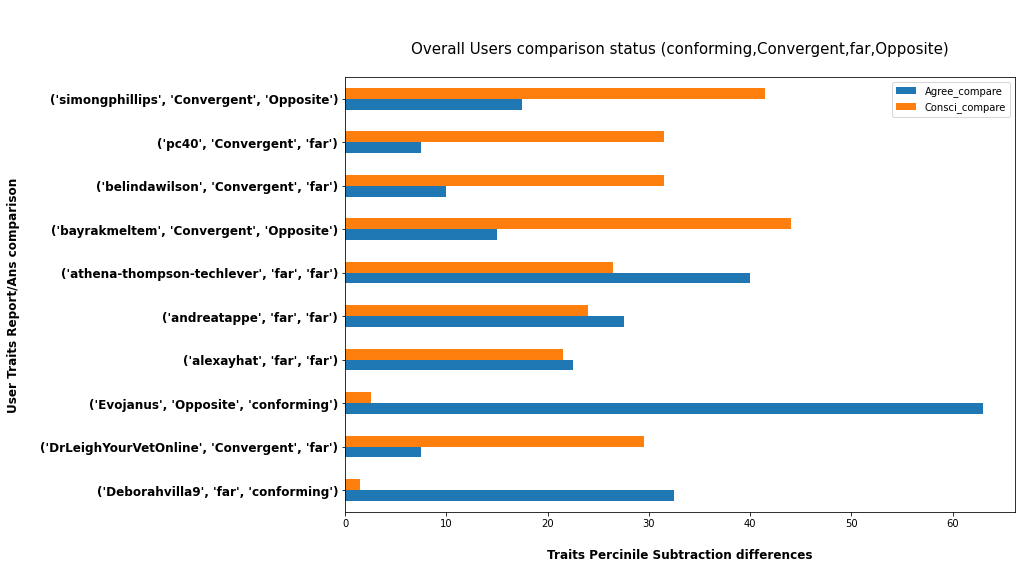

In [ ]:
comparison_df1 = comparison_df.groupby(['User_names','Agree_compare_cat','Consci_compare_cat']).mean()[['Agree_compare','Consci_compare']]
ax = comparison_df1.plot(kind='barh', figsize=(12, 8),zorder=2, width=0.5)
# Set x-axis label
ax.set_xlabel("Traits Percinile Subtraction differences", labelpad=20, weight='bold', size=12)
# Set y-axis label
ax.set_ylabel("User Traits Report/Ans comparison", labelpad=20, weight='bold', size=12)

ax.set_yticklabels(comparison_df1.index, Fontsize=12, weight='bold' )

plt.title('\n\nOverall Users comparison status (conforming,Convergent,far,Opposite)\n',fontsize=15)

plt.show()

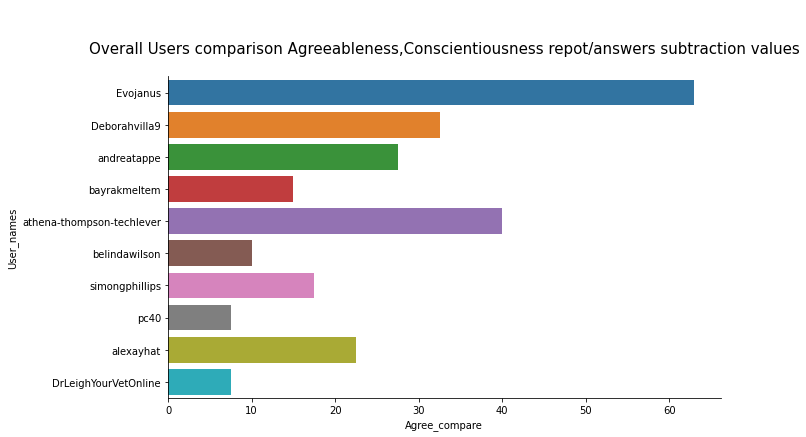

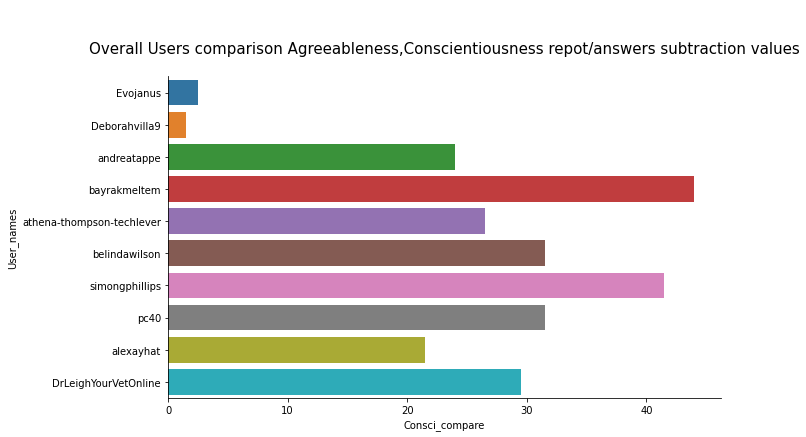

In [ ]:
sns.catplot(data=comparison_df,
                    x='Agree_compare',
                    y='User_names',
                    kind='bar',
                    height=5, # make the plot 5 units high
                    aspect=2) 
plt.title('\n\nOverall Users comparison Agreeableness,Conscientiousness repot/answers subtraction values\n',fontsize=15)
sns.catplot(data=comparison_df,
                    x='Consci_compare',
                    y='User_names',
                    kind='bar',
                    height=5, # make the plot 5 units high
                    aspect=2) 
plt.title('\n\nOverall Users comparison Agreeableness,Conscientiousness repot/answers subtraction values\n',fontsize=15)
plt.show()

**Some Extra analytics of data**

In [ ]:
Extra_df = User_Traits_data.T[0:10]
Extra_df['Gender'] = list(Perc_q_data['What is your sex?'])
Extra_df['country'] = list(Perc_q_data['What is your country of residence?'])
Extra_df['Age_group'] = list(Perc_q_data['What age bracket do you fall in?'])
#assure the numric column type to be float
Extra_df[['Agreeableness', 'Conscientiousness', 'Emotional range', 'Extraversion','Openness']] = Extra_df[['Agreeableness', 'Conscientiousness', 'Emotional range', 'Extraversion','Openness']].astype(float)
Extra_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Evojanus(%) to DrLeighYourVetOnline(%)
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Agreeableness      10 non-null     float64
 1   Conscientiousness  10 non-null     float64
 2   Emotional range    10 non-null     float64
 3   Extraversion       10 non-null     float64
 4   Openness           10 non-null     float64
 5   Gender             10 non-null     object 
 6   country            10 non-null     object 
 7   Age_group          10 non-null     object 
dtypes: float64(5), object(3)
memory usage: 720.0+ bytes


In [ ]:
print('  Obviously we have lake of data as all Males are in only two age group\nPlus to no males from Albania nor Italy, Moreover no female from United States\n')
Extra_df.groupby(['Gender','country','Age_group']).mean()#.plot(kind='barh',figsize=(15,8))

  Obviously we have lake of data as all Males are in only two age group
Plus to no males from Albania nor Italy, Moreover no female from United States



index                           Agreeableness  ...  Openness
Gender country       Age_group                 ...          
Female Albania       18-24              72.50  ...     77.50
       Australia     25-29              83.75  ...     72.50
                     35-39              55.00  ...     60.00
                     45-49              92.50  ...     72.50
                     50-54              76.25  ...     76.25
       Italy         18-24              62.50  ...     65.00
Male   Australia     45-49              77.50  ...     70.00
       United States 30-34              65.00  ...     55.00

[8 rows x 5 columns]

In [610]:
Extra_df.groupby(['Gender','country','Age_group']).mean().to_csv('Extra_analytics.csv')

Below charts indecate that Agreeableness, Emotional range and Openness is higher in females then male
 


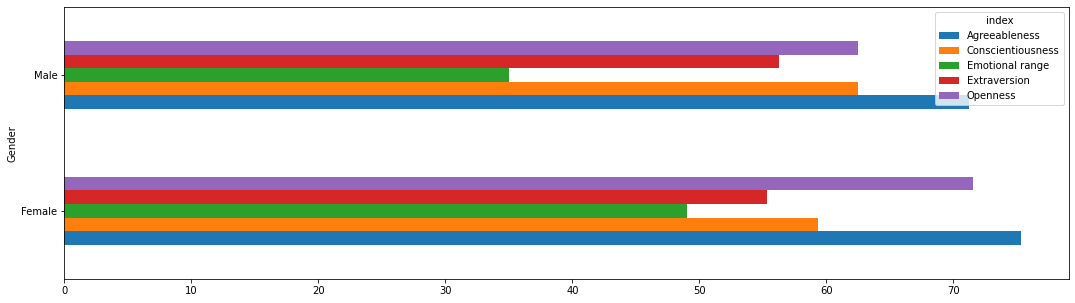

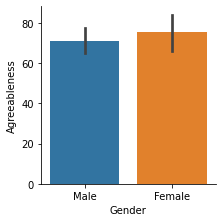

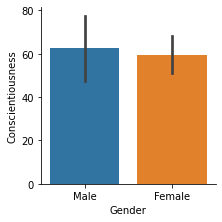

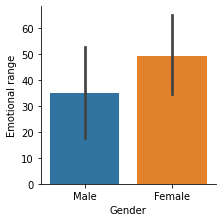

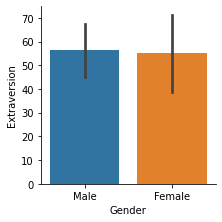

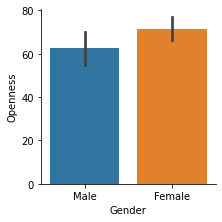

In [ ]:
# Extra_df.groupby
# plt.figure(figsize=(10,5))
print('Below charts indecate that Agreeableness, Emotional range and Openness is higher in females then male\n ')
Extra_df.groupby(['Gender']).mean().plot(kind='barh',figsize=(18,5))
for g in ['Agreeableness', 'Conscientiousness', 'Emotional range', 'Extraversion','Openness']:
    sns.catplot(data=Extra_df, x='Gender', y=g, kind='bar', height=3,aspect=1) 

Below charts indecate that:
Agreeableness is highest in age group 45-49 and 25-29
Conscientiousness is highest in 25-29 age group and lowest in 18-24 and 30-34
Emotional range is highest in 18-24 and lowest in 30-34 
Extraversion is high on all age groups
Openness is higher in females then male



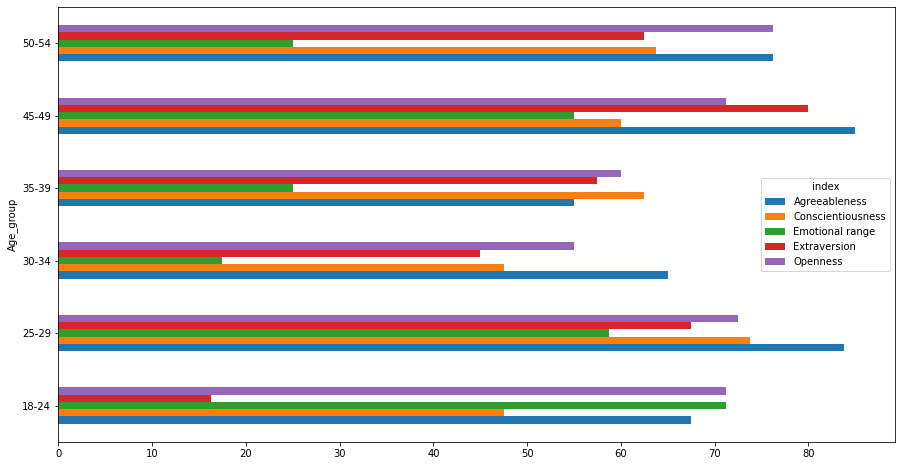

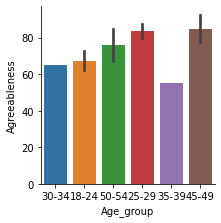

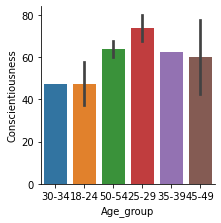

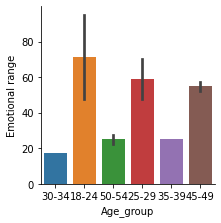

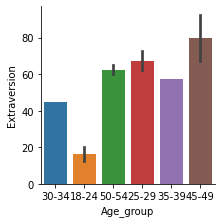

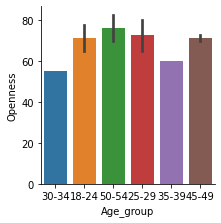

In [ ]:
# Extra_df.groupby
print('Below charts indecate that:\nAgreeableness is highest in age group 45-49 and 25-29\nConscientiousness is highest in 25-29 age group and lowest in 18-24 and 30-34\nEmotional range is highest in 18-24 and lowest in 30-34 \nExtraversion is high on all age groups\nOpenness is higher in females then male\n')
Extra_df.groupby(['Age_group']).mean().plot(kind='barh',figsize=(15,8))
for g in ['Agreeableness', 'Conscientiousness', 'Emotional range', 'Extraversion','Openness']:
    sns.catplot(data=Extra_df, x='Age_group', y=g, kind='bar', height=3,aspect=1) 
plt.show()

Below charts indecate that:
Agreeableness and Conscientiousness is highest in Australia
Emotional range is highest in Albania and lowest in United state
Extraversion is highest in Australia and lowest in Italy
Openness is highest in Albania



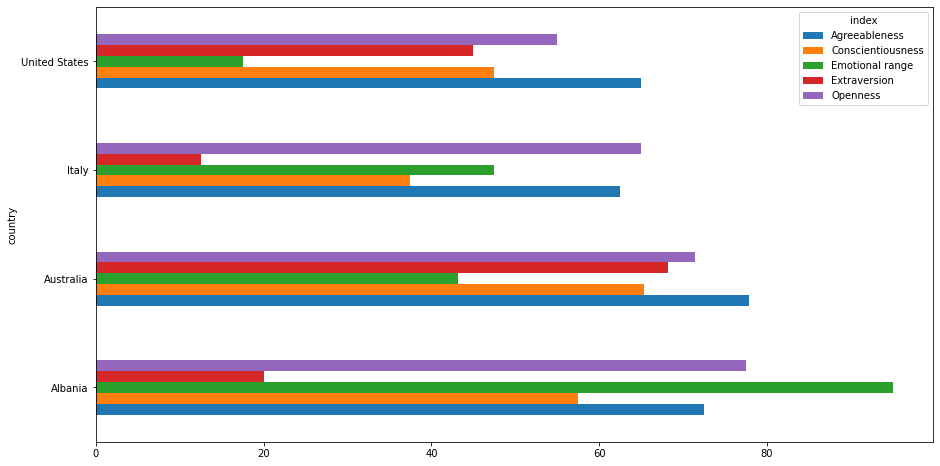

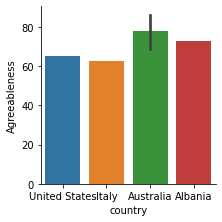

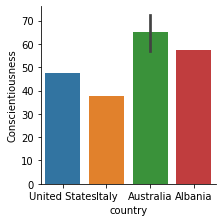

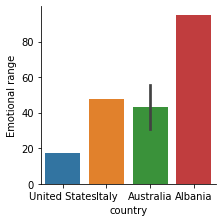

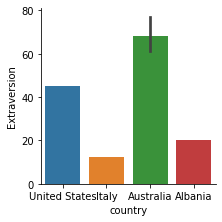

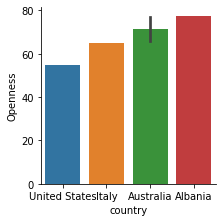

In [ ]:
# Extra_df.groupby
print('Below charts indecate that:\nAgreeableness and Conscientiousness is highest in Australia\nEmotional range is highest in Albania and lowest in United state\nExtraversion is highest in Australia and lowest in Italy\nOpenness is highest in Albania\n')
Extra_df.groupby(['country']).mean().plot(kind='barh',figsize=(15,8))
for g in ['Agreeableness', 'Conscientiousness', 'Emotional range', 'Extraversion','Openness']:
    sns.catplot(data=Extra_df, x='country', y=g, kind='bar', height=3,aspect=1) 
plt.show()